## Problem Statement
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

Before I build a model to tackle the real problem, I will do exploratory data analysis first to analyze the data sets and see what the data can tell us beyond the formal modeling.

### 1. Import libraries and load the data set

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [78]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('Sample_Submission.csv')

In [3]:
train.head() 

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [5]:
#train set
print('Variable', ' '*13, 'count of unique value',' '*15, 'content')
for column in train.columns:
    uniques = train[column].unique()
    print('{0:26s} {1:13d}\t'.format(column, len(uniques)), uniques[:5])
print('-'*120)
print("Total records in the train set:",len(train))

Variable               count of unique value                 content
User_ID                             5891	 [1000001 1000002 1000003 1000004 1000005]
Product_ID                          3631	 ['P00069042' 'P00248942' 'P00087842' 'P00085442' 'P00285442']
Gender                                 2	 ['F' 'M']
Age                                    7	 ['0-17' '55+' '26-35' '46-50' '51-55']
Occupation                            21	 [10 16 15  7 20]
City_Category                          3	 ['A' 'C' 'B']
Stay_In_Current_City_Years             5	 ['2' '4+' '3' '1' '0']
Marital_Status                         2	 [0 1]
Product_Category_1                    20	 [ 3  1 12  8  5]
Product_Category_2                    18	 [nan  6. 14.  2.  8.]
Product_Category_3                    16	 [nan 14. 17.  5.  4.]
Purchase                           18105	 [ 8370 15200  1422  1057  7969]
------------------------------------------------------------------------------------------------------------------------


In [6]:
# test set 
print('Variable', ' '*13, 'count of unique value',' '*15, 'content')
for column in test.columns:
    uniques = test[column].unique()
    print('{0:26s} {1:13d}\t'.format(column, len(uniques)), uniques[:5])
print('-'*120)
print("Total records in the train set:",len(test))

Variable               count of unique value                 content
User_ID                             5891	 [1000004 1000009 1000010 1000011 1000013]
Product_ID                          3491	 ['P00128942' 'P00113442' 'P00288442' 'P00145342' 'P00053842']
Gender                                 2	 ['M' 'F']
Age                                    7	 ['46-50' '26-35' '36-45' '18-25' '51-55']
Occupation                            21	 [ 7 17  1 15  3]
City_Category                          3	 ['B' 'C' 'A']
Stay_In_Current_City_Years             5	 ['2' '0' '4+' '1' '3']
Marital_Status                         2	 [1 0]
Product_Category_1                    18	 [1 3 5 4 2]
Product_Category_2                    18	 [11.  5. 14.  9.  3.]
Product_Category_3                    16	 [nan 12. 15.  9. 16.]
------------------------------------------------------------------------------------------------------------------------
Total records in the train set: 233599


In [7]:
# Check for duplicates
idsUnique = len(set(train.User_ID))
idsTotal = train.shape[0]
idsDupli = idsTotal - idsUnique
print("There are " + str(idsDupli) + " duplicate IDs for " + str(idsTotal) + " total entries")

There are 544177 duplicate IDs for 550068 total entries



We can see that 5891 users have over 550,068 shopping records in the train set which means each customer buy almost 100 products on average.

### 2. Check missing values

In [8]:
print('Train columns with null values:')
print(train.isnull().sum())
print("-"*10)
print('Test/Validation columns with null values:')
print(test.isnull().sum())
print("-"*10)

Train columns with null values:
User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64
----------
Test/Validation columns with null values:
User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64
----------


In [14]:
columns = ['Product_Category_1','Product_Category_2','Product_Category_3']
for column in columns:
    if 0 in train[column].unique():
        print(column,'variable in train set does not contain zero value')
    elif 0 in test[column].unique():
        print(column,'variable in test set contain zero value')
    elif 0 not in train[column].unique() and 0 not in test[column].unique(): 
        print(column,'variable in train and test set do not contain zero value')

Product_Category_1 variable in train and test set do not contain zero value
Product_Category_2 variable in train and test set do not contain zero value
Product_Category_3 variable in train and test set do not contain zero value


We can note that there exists missing value in variable 'Product_Category_2' and 'Product_Category_3' with both train and test set. I am planning to replace them with zero because all product categories do not contain zero value which has little influence in our dataset.

In [79]:
## impute missing value with zero 
columns = ['Product_Category_2','Product_Category_3']
for column in columns:
    train[column].fillna(0,inplace=True)
    test[column].fillna(0,inplace=True)
train.isnull().values.any(),test.isnull().values.any()

(False, False)

### 3. Correlation between Numerical Predictors and Target variable

In [80]:
numeric_features=train[['User_ID','Occupation','Marital_Status','Product_Category_1','Product_Category_2',
                      'Product_Category_3','Purchase']]
corr = numeric_features.corr()
print (corr['Purchase'].sort_values(ascending=False)[:10], '\n')
print (corr['Purchase'].sort_values(ascending=False)[-10:])

Purchase              1.000000
Product_Category_3    0.288501
Product_Category_2    0.052288
Occupation            0.020833
User_ID               0.004716
Marital_Status       -0.000463
Product_Category_1   -0.343703
Name: Purchase, dtype: float64 

Purchase              1.000000
Product_Category_3    0.288501
Product_Category_2    0.052288
Occupation            0.020833
User_ID               0.004716
Marital_Status       -0.000463
Product_Category_1   -0.343703
Name: Purchase, dtype: float64


There does not seem to be any predictor that would have a high impact on Purchase , since the highest correlation is give by Occupation with 0.0208. On the other hand, Product_Category_1 has a negative correlation with our target with the value -0.3437 which is somehow odd

In [81]:
corr.style.background_gradient(cmap='coolwarm')

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1,-0.0239707,0.0204426,0.00382461,0.00389581,0.00360526,0.00471566
Occupation,-0.0239707,1,0.02428,-0.00761756,0.00671225,0.0122689,0.0208326
Marital_Status,0.0204426,0.02428,1,0.0198879,0.00109912,-0.00462933,-0.000463376
Product_Category_1,0.00382461,-0.00761756,0.0198879,1,-0.0678774,-0.385534,-0.343703
Product_Category_2,0.00389581,0.00671225,0.00109912,-0.0678774,1,0.0947495,0.0522877
Product_Category_3,0.00360526,0.0122689,-0.00462933,-0.385534,0.0947495,1,0.288501
Purchase,0.00471566,0.0208326,-0.000463376,-0.343703,0.0522877,0.288501,1


There seems to be no multicollinearity with our predictors which is a good thing, although there is some correlation among the product categorie, but the correlation is small.

### 4.Discover and visualize the data to gain insights

Before we dive into the model, I will explore data analysis and data visualization, which gives me insights for which columns might have a correlation or be helpful to predict our goal, i.e. amount of purchase

In [ ]:
## change product category to int type
train["Product_Category_2"] = train["Product_Category_2"].astype(int)
train["Product_Category_3"] = train["Product_Category_3"].astype(int)

In [17]:
train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,6.735436,3.841941,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,6.215492,6.250712,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,0.000000,0.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,0.000000,0.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,5.000000,0.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,14.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


#### 4.1 Distribution of the Purchase amount

Text(0.5, 1.0, 'Purchase amount Distribution')

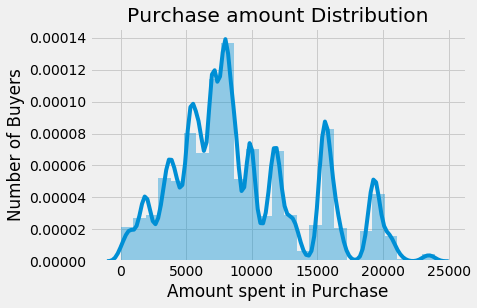

In [18]:
plt.style.use('fivethirtyeight')
sns.distplot(train.Purchase, bins = 25)
plt.xlabel("Amount spent in Purchase")
plt.ylabel("Number of Buyers")
plt.title("Purchase amount Distribution")

It seems like our target variable has an almost Gaussian distribution.

#### 4.2 Distribution of the variable Gender
Most of the buyers are males, but who spends more on each purchase: man or woman?

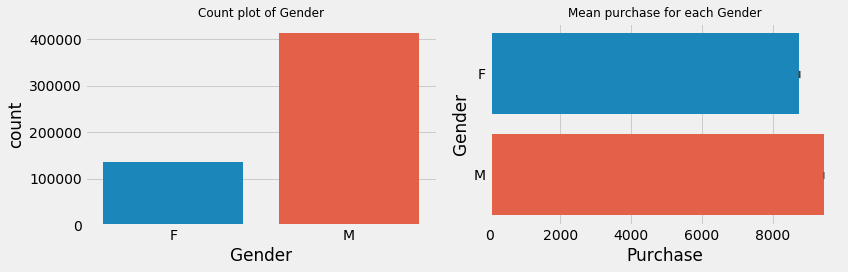

In [39]:
# Gender variable visualization
fig, ax = plt.subplots(1,2,figsize=(12,4))
sns.countplot(train['Gender'],ax=ax[0] );
ax[0].set_title('Count plot of Gender',fontsize=12);
sns.barplot(train['Purchase'],train['Gender'],ax=ax[1]);
ax[1].set_title('Mean purchase for each Gender',fontsize=12);
plt.tight_layout()
plt.show()

(1) From the plots, we know on average the male gender spends more money on purchase contrary to female.

(2) On average the male gender spends more money on purchase contrary to female. This conclusion seems reasonable since the percentage of male buyers is higher than female buyers.

#### 4.3 Distribution of the variable Age

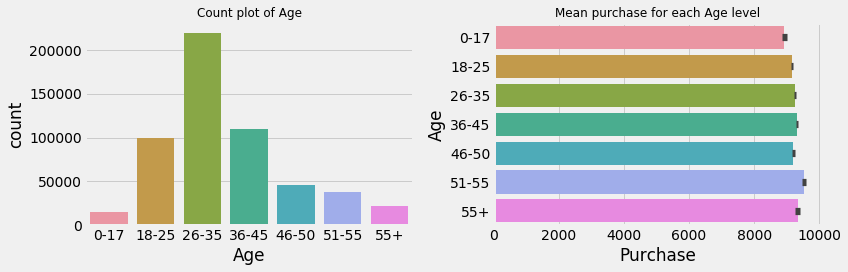

In [38]:
fig, ax = plt.subplots(1,2,figsize=(12,4))
sns.countplot(train['Age'],order=sorted(train['Age'].value_counts().index),ax=ax[0]);
ax[0].set_title('Count plot of Age',fontsize=12);
sns.barplot(train['Purchase'],train['Age'],order=sorted(train['Age'].value_counts().index),ax=ax[1]);
ax[1].set_title('Mean purchase for each Age level',fontsize=12);
plt.tight_layout()
plt.show()

(1) Most purchases are made by people between 18 to 45 years old.

(2) The amount spent is almost the same for everyone. Curiously, on average customer with more than 50 years old are the ones who spent the most.

#### 4.4 Distribution of the variable Marital_Status 

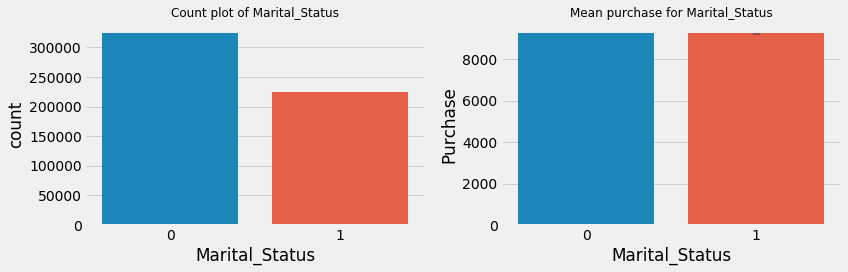

In [40]:
fig, ax = plt.subplots(1,2,figsize=(12,4))
sns.countplot(train['Marital_Status'],ax=ax[0]);
ax[0].set_title('Count plot of Marital_Status',fontsize=12);
sns.barplot(train['Marital_Status'],train['Purchase'],ax=ax[1]);
ax[1].set_title('Mean purchase for Marital_Status',fontsize=12);
plt.tight_layout()
plt.show()

There are more single people buying products on Black Friday than married people, but do they spend more?
Actually, on average an individual customer tends to spend the same amount independently if his/her is married or not. Again, if you had all the purchases the single group, since has a higher representation, will have the highest purchase values.


#### 4.5 Distribution of the variable Occupation 

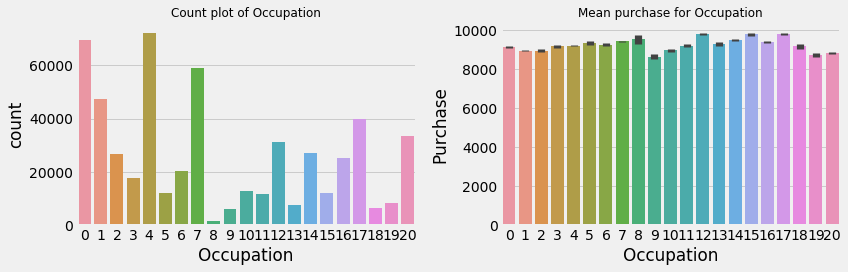

In [42]:
fig, ax = plt.subplots(1,2,figsize=(12,4))
sns.countplot(train['Occupation'],ax=ax[0]);
ax[0].set_title('Count plot of Occupation',fontsize=12);
sns.barplot(train['Occupation'],train['Purchase'],ax=ax[1]);
ax[1].set_title('Mean purchase for Occupation',fontsize=12);
plt.tight_layout()
plt.show()

(1) As seen in plots, Occupation has at least 20 different values. Most purchases are made by people who have Occupation_0,1,4,7. Since we do not known to each occupation each number corresponds, is difficult to make any analysis. 

(2) Although there are some occupations which have higher representations, it seems that the amount each user spends on average is more or less the same for all occupations. Of course, in the end, occupations with the high representations will have the high amounts of purchases.

#### 4.6 Distribution of the variable City_Category 

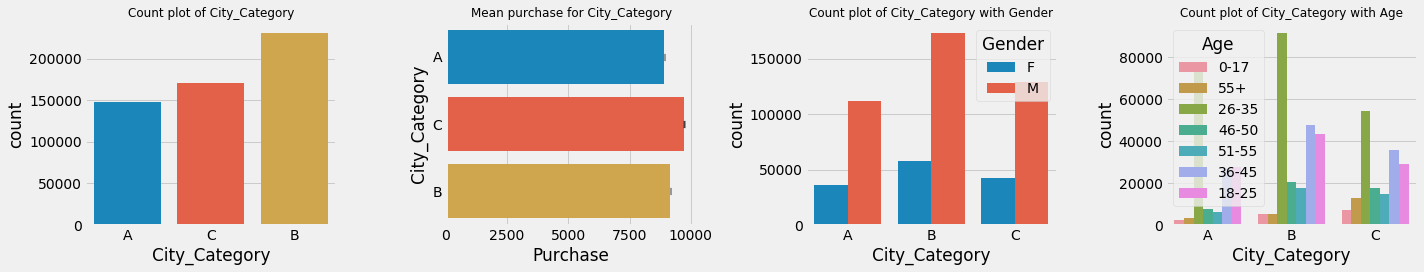

In [43]:
fig, ax = plt.subplots(1,4,figsize=(20,4))
sns.countplot(train['City_Category'],ax=ax[0]);
ax[0].set_title('Count plot of City_Category',fontsize=12);
sns.barplot(train['Purchase'],train['City_Category'],ax=ax[1]);
ax[1].set_title('Mean purchase for City_Category',fontsize=12)
sns.countplot(train['City_Category'],hue=train['Gender'],order=sorted(train['City_Category'].value_counts().index),ax=ax[2]);
ax[2].set_title('Count plot of City_Category with Gender',fontsize=12);
sns.countplot(train['City_Category'],hue=train['Age'],order=sorted(train['City_Category'].value_counts().index),ax=ax[3]);
ax[3].set_title('Count plot of City_Category with Age',fontsize=12);
plt.tight_layout()
plt.show()

(1) As seen in the plot, City B had highest sales than the others.  

(2) We saw previously that city type ‘B’ had the highest number of purchases registered. However, the city whose buyers spend the most is city type ‘C’.   

(3) For each City, Male customers bought more.   

(4) For each City, Age 26-35 bought more on black friday.

#### 4.7 Distribution of the variable Stay_In_Current_City_Years

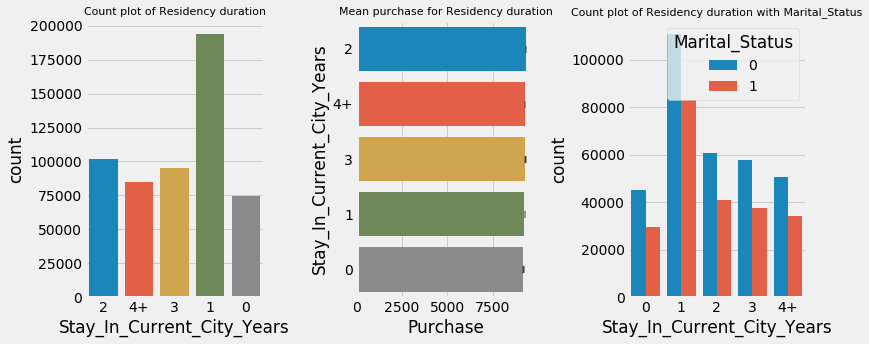

In [45]:
fig, ax = plt.subplots(1,3,figsize=(12,5))
sns.countplot(train['Stay_In_Current_City_Years'],ax=ax[0]);
ax[0].set_title('Count plot of Residency duration',fontsize=11);
sns.barplot(train['Purchase'],train['Stay_In_Current_City_Years'],ax=ax[1]);
ax[1].set_title('Mean purchase for Residency duration',fontsize=11)
sns.countplot(train['Stay_In_Current_City_Years'],hue=train['Marital_Status'],
              order=sorted(train['Stay_In_Current_City_Years'].value_counts().index),ax=ax[2])
ax[2].set_title('Count plot of Residency duration with Marital_Status',fontsize=11);
plt.tight_layout()
plt.show()

(1) The tendency looks like the longest someone is living in that city the less prone they are to buy new things.

(2) Again, we see that on average people tend to spend the same amount on purchases regardeless of their group. People who are new in city are responsible for the higher number of purchase, however looking at it individually they tend to spend the same amount independently of how many years the have lived in their current city

Hence, It could be that if someone is new in town and needs a great number of new things for their house that they’ll take advantage of the low prices in Black Friday to purchase all the things needed. That's the reason why there is the number of new-in-town customers is larger but the purchase amount between each group is almost the same.

(3) For each City, more Single than Married. 


#### 4.8 Distribution of the variable Product_Category1, 2, 3

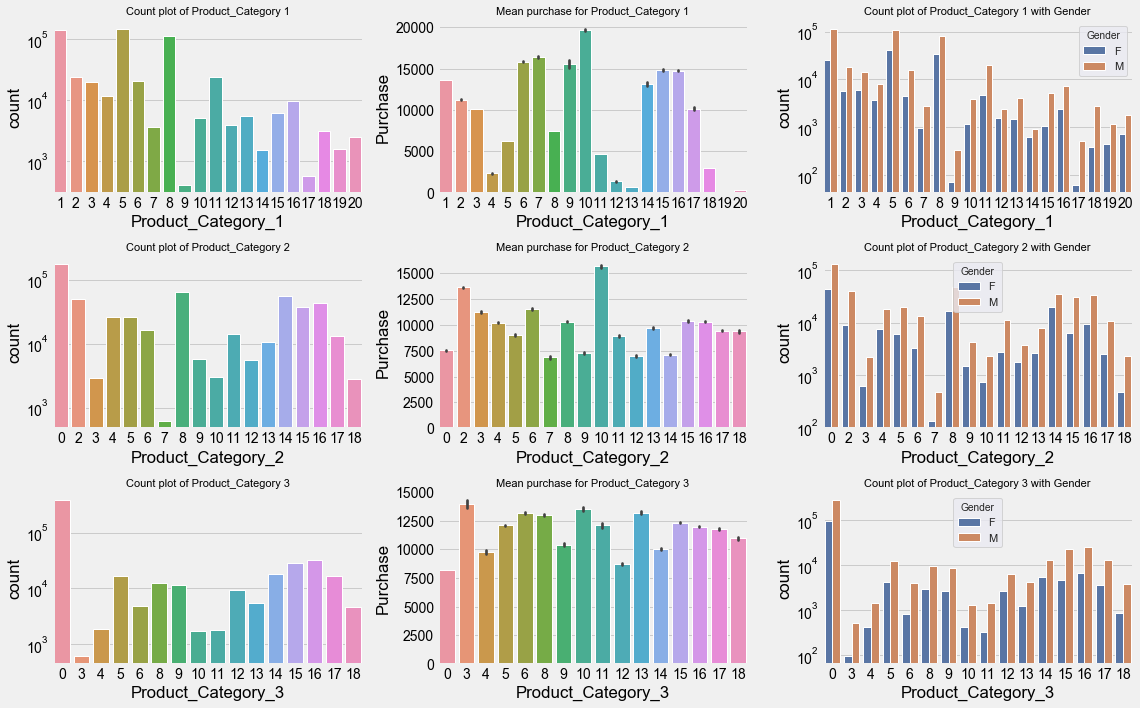

In [47]:
## Product_Category variable visualization
fig, ax = plt.subplots(3,3,figsize=(16,10))
sns.set()
sns.countplot(train['Product_Category_1'],order=sorted(train['Product_Category_1'].value_counts().index),ax=ax[0,0]);
ax[0,0].set_title('Count plot of Product_Category 1',fontsize=11);ax[0,0].set_yscale('log');
sns.barplot(train['Product_Category_1'],train['Purchase'],ax=ax[0,1]);
ax[0,1].set_title('Mean purchase for Product_Category 1',fontsize=11);
sns.countplot(train['Product_Category_1'],hue=train['Gender'],order=sorted(train['Product_Category_1'].value_counts().index),ax=ax[0,2]);
ax[0,2].set_title('Count plot of Product_Category 1 with Gender',fontsize=11);
ax[0,2].set_yscale('log')
sns.countplot(train['Product_Category_2'],order=sorted(train['Product_Category_2'].value_counts().index),ax=ax[1,0])
ax[1,0].set_title('Count plot of Product_Category 2',fontsize=11);ax[1,0].set_yscale('log');
sns.barplot(train['Product_Category_2'],train['Purchase'],ax=ax[1,1])
ax[1,1].set_title('Mean purchase for Product_Category 2',fontsize=11);
sns.countplot(train['Product_Category_2'],hue=train['Gender'],order=sorted(train['Product_Category_2'].value_counts().index),ax=ax[1,2]);
ax[1,2].set_title('Count plot of Product_Category 2 with Gender',fontsize=11);
ax[1,2].set_yscale('log')
sns.countplot(train['Product_Category_3'],order=sorted(train['Product_Category_3'].value_counts().index),ax=ax[2,0])
ax[2,0].set_title('Count plot of Product_Category 3',fontsize=11);ax[2,0].set_yscale('log');
sns.barplot(train['Product_Category_3'],train['Purchase'],ax=ax[2,1]);
ax[2,1].set_title('Mean purchase for Product_Category 3',fontsize=11);
sns.countplot(train['Product_Category_3'],hue=train['Gender'],order=sorted(train['Product_Category_3'].value_counts().index),ax=ax[2,2]);
ax[2,2].set_title('Count plot of Product_Category 3 with Gender',fontsize=11);
ax[2,2].set_yscale('log')
plt.tight_layout()
plt.show()

(1) From the distribution for products from category 1, it is clear that three products stand out, number 1, 5 and 8. Unfortunately, we do not know which product each number represents.

You see that although there were more products bought for categories 1,5,8 the average amount spent for those three is not the highest. It is interesting to see other categories appearing with high purchase values despite having low impact on sales number.


(2)From the distribution for products from category 2, it is clear that three products stand out, number 1, 8 and 14. Unfortunately, we do not know which product each number represents.

You see that although there were more products bought for categories 1,8,14 the average amount spent for those three is not the highest. It is interesting to see other categories appearing with high purchase values despite having low impact on sales number.


(3)From the distribution for products from category 3, it is clear that three products stand out, number 1, 15 and 16. Unfortunately, we do not know which product each number represents.

You see that although there were more products bought for categories 1,15,16 the average amount spent for those three is not the highest. It is interesting to see other categories appearing with high purchase values despite having low impact on sales number.


#### 4.8.1 More details
Additionally, we could check further by splitting customers into four parts, like married female, married male, single female and single male, simply by creating another column and combining gender with marital status

In [48]:
train['combined_G_M'] = train.apply(lambda x:'%s_%s' % (x['Gender'],x['Marital_Status']),axis=1)
print(train['combined_G_M'].unique())
 

['F_0' 'M_0' 'M_1' 'F_1']


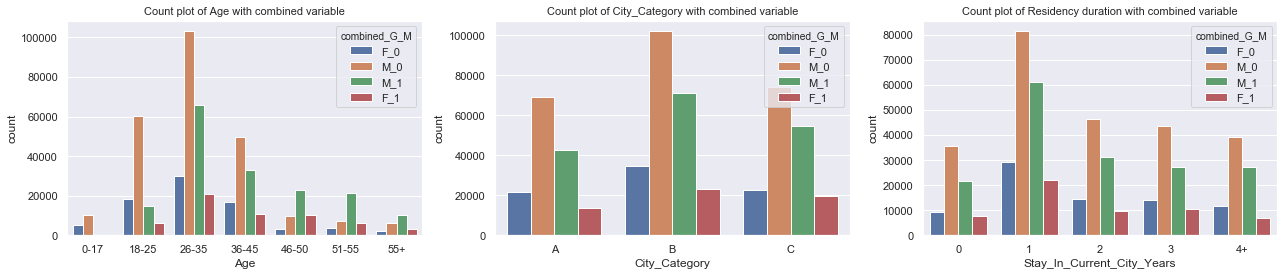

In [49]:
# Combination variable visualization
fig, ax = plt.subplots(1,3,figsize=(18,4))
sns.countplot(train['Age'],hue=train['combined_G_M'],order=sorted(train['Age'].value_counts().index),ax=ax[0]);
ax[0].set_title('Count plot of Age with combined variable',fontsize=11);
sns.countplot(train['City_Category'],hue=train['combined_G_M'],order=sorted(train['City_Category'].value_counts().index),ax=ax[1]);
ax[1].set_title('Count plot of City_Category with combined variable',fontsize=11);
sns.countplot(train['Stay_In_Current_City_Years'],hue=train['combined_G_M'],
              order=sorted(train['Stay_In_Current_City_Years'].value_counts().index),ax=ax[2]);
ax[2].set_title('Count plot of Residency duration with combined variable',fontsize=11);
plt.tight_layout()
plt.show()

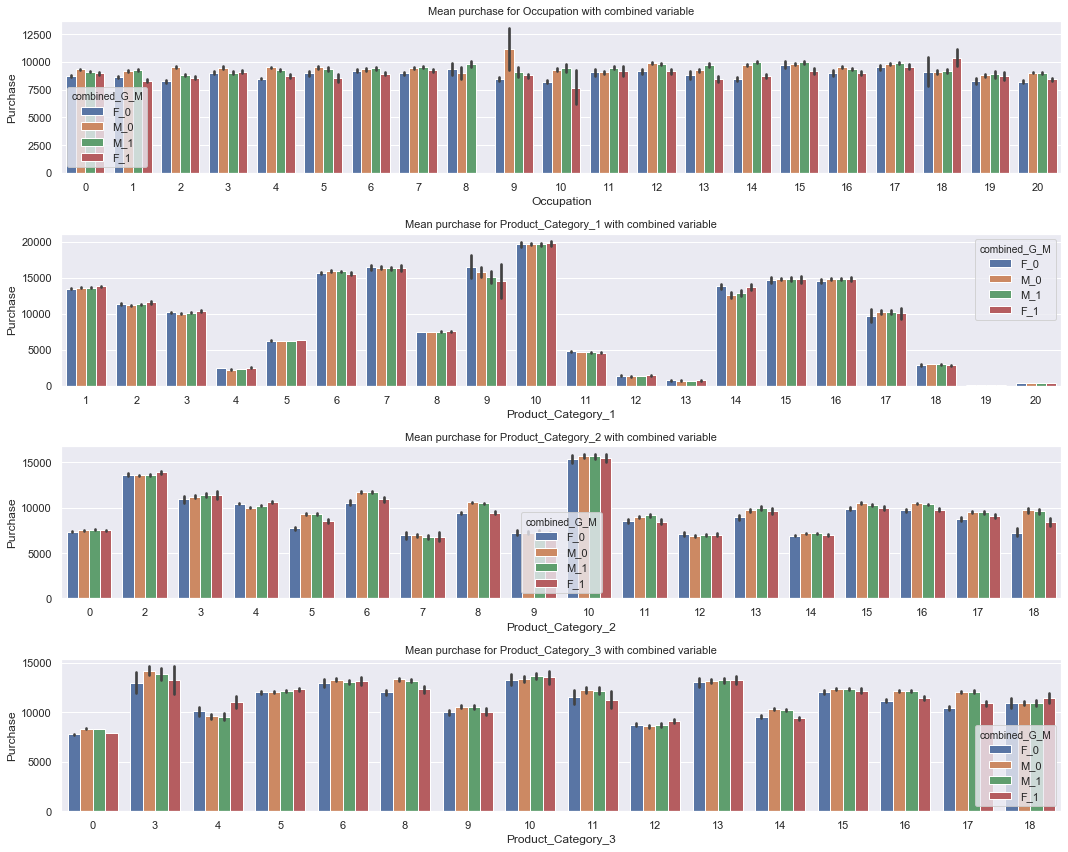

In [50]:
# Combination variable visualization
fig, ax = plt.subplots(4,1,figsize=(15,12))
sns.barplot(train['Occupation'],train['Purchase'],hue=train['combined_G_M'],order=sorted(train['Occupation'].value_counts().index),ax=ax[0]);
ax[0].set_title('Mean purchase for Occupation with combined variable',fontsize=11);
sns.barplot(train['Product_Category_1'],train['Purchase'],hue=train['combined_G_M'],order=sorted(train['Product_Category_1'].value_counts().index),ax=ax[1]);
ax[1].set_title('Mean purchase for Product_Category_1 with combined variable',fontsize=11);
sns.barplot(train['Product_Category_2'],train['Purchase'],hue=train['combined_G_M'],
              order=sorted(train['Product_Category_2'].value_counts().index),ax=ax[2]);
ax[2].set_title('Mean purchase for Product_Category_2 with combined variable',fontsize=11);
sns.barplot(train['Product_Category_3'],train['Purchase'],hue=train['combined_G_M'],
              order=sorted(train['Product_Category_3'].value_counts().index),ax=ax[3]);
ax[3].set_title('Mean purchase for Product_Category_3 with combined variable',fontsize=11);

plt.tight_layout()
plt.show()

### Conclusion:

In general, what we could find is:

(1) Male shopped more than Female for all ages, especially 26-35 yrs range.

(2) Single shopped more than Married but mean purchase keeps the same.

(3) Customers from City B shopped the most.

(4) Customers who has lived in their city for 1 year shopped the most.

(5) Product_category_1 #1,5,8 were the most selling.

(6) Unmarried male had the greatest purchasing power.